## Starting off with the Ames Real Estate dataset - Data Cleaning

### Problem Statement: What features of a low-assessed real estate property are the most valuable for improving sale price?

#### Sources, Ideas:

[Source 1](https://www.fscb.com/blog/6-ways-you-can-increase-the-value-of-your-home).<br> 
* Using this [article](https://www.hgtv.com/lifestyle/clean-and-organize/which-home-improvements-pay-off), kitchen/bathroom remodels bring in a lot of value. (**kitchen_qual**) <br> 
* quality of exterior/roofing is very important (**exter_qual**, maybe **roof_style**, **roof_matl**)
* **neighborhood** is definitely important (first law of georgraphy, 'everything is usually related to all else but those which are near to each other are more related when compared to those that are further away'.)
* Finished square footage is an important calculation when determining your home’s fair market value (**bsmtfin_sf_1**, **bsmtfin_type_1**, and for 2 i guess, idk what the difference is though) . from Source 1
* maybe ratio of bath/bedrooms?
* interaction between prescence of pool and qualities listed in this [article](https://www.ramseysolutions.com/real-estate/pool-increase-decrease-home-value). 
    * You live in a higher-end neighborhood where most of your neighbors have pools. (pool area/qc * neighborhood?)
    
    * The pool doesn’t take up your entire yard—there’s still room for a swing set and a garden. (Pool area / lot area)
    
    * The style of the pool fits with your home and neighborhood, and it’s well maintained. (pool_qc = Ex)
    
* costs about 4.5K to pave a driveway on average in the nation. how much return could that get? [paved driveway article](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiE29LUz5b3AhXmlWoFHVI9B90QFnoECBEQAQ&url=https%3A%2F%2Fwww.bobvila.com%2Farticles%2Fhow-much-does-it-cost-to-pave-a-driveway%2F&usg=AOvVaw1vblwrVJFtWkVCI8LdZlME)

In [790]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import collections

In [471]:
ames = pd.read_csv('./datasets/train.csv', keep_default_na=False, na_values=False)

In [477]:
ames.shape

(2051, 81)

checking for nulls

In [473]:
ames.isnull().sum()[ames.isnull().sum() > 0].sort_values(ascending=False)

Pool Area          2042
3Ssn Porch         2025
Low Qual Fin SF    2018
Misc Val           1986
Bsmt Half Bath     1923
Screen Porch       1870
BsmtFin SF 2       1803
Enclosed Porch     1724
Half Bath          1308
Mas Vnr Area       1216
Bsmt Full Bath     1200
2nd Flr SF         1191
Wood Deck SF       1075
Fireplaces         1000
Open Porch SF       912
BsmtFin SF 1        657
Bsmt Unf SF         165
Garage Cars         113
Garage Area         113
Total Bsmt SF        54
Full Bath             8
Bedroom AbvGr         5
Kitchen AbvGr         2
dtype: int64

In [474]:
# fixing all the continuous/discrete columns that have na's instead of a zero
cols_na_to_zero = list(i[0] for i in ames.isnull().sum()[ames.isnull().sum() > 0].sort_values(ascending=False).iteritems())

ames[cols_na_to_zero] = ames[cols_na_to_zero].replace(np.nan, 0)

In [476]:
ames.isnull().sum()[ames.isnull().sum() > 0].sort_values(ascending=False) # all clean

Series([], dtype: int64)

In [478]:
ames.columns = ames.columns.str.lower().str.replace(' ', '_') # making columns lowercase, replacing spaces with underscores

In [479]:
ames.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

#### convert object columns that contain numbers to numeric columns

In [494]:
object_cols = [i[0] for i in ames.dtypes.iteritems() if (i[1] != int and i[1] != float)]
# object_ames = ames[object_cols]

In [503]:
ames[object_cols].dtypes.value_counts()

object    53
dtype: int64

In [505]:
ames[object_cols].head(3)

,ms_zoning,lot_frontage,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,...,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,RFn,2,475,TA,TA,Y,NA,NA,NA,WD
1,RL,43,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,RFn,2,559,TA,TA,Y,NA,NA,NA,WD
2,RL,68,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1,246,TA,TA,Y,NA,NA,NA,WD


In [508]:
cols_obj_to_num = ['lot_frontage', 'garage_cars', 'garage_area', 'mas_vnr_area', 'bsmtfin_sf_1', 
                   'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',
                   'garage_yr_blt']

In [509]:
ames[cols_obj_to_num] = ames[cols_obj_to_num].replace('', '0').astype(int) # converting object columns with numbers to int

In [510]:
ames[object_cols].dtypes.value_counts(), len(cols_obj_to_num)

(object    42
 int64     11
 dtype: int64,
 11)

In [511]:
ames.shape

(2051, 81)

#### deal with missing values in object columns (idk if this is necessary yet)

In [487]:
#### deal with missing values in object columns (idk if this is necessary yet)
# nonnum_cols = [i[0] for i in object_ames[set(object_ames.columns).difference(cols_obj_to_num)].iteritems()] # get cols from object_ames that are still objects

# nonnum_ames = object_ames[nonnum_cols]

# nonnum_ames[list(i[0] for i in nonnum_ames.isin(['None', 'NA']).sum().iteritems() if i[1] > 0)] # non-numeric cols with more than one 'NA' or 'None'
# # nonnum_ames.head(3)

In [488]:
nonnum_cols = [i[0] for i in object_ames[set(object_ames.columns).difference(cols_obj_to_num)].iteritems()] # get cols from object_ames that are still objects

nonnum_ames = object_ames[nonnum_cols]

In [489]:
# ONLY RUN ONCE
final_ames = pd.concat([final_ames, nonnum_ames], axis = 1)

In [490]:
final_ames.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,foundation,pool_qc,alley,kitchen_qual,fence,bldg_type,bsmt_cond,bsmtfin_type_1,mas_vnr_type,neighborhood
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,...,CBlock,NA,NA,Gd,NA,1Fam,TA,GLQ,BrkFace,Sawyer
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,PConc,NA,NA,Gd,NA,1Fam,TA,GLQ,BrkFace,SawyerW
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,CBlock,NA,NA,Gd,NA,1Fam,TA,GLQ,None,NAmes


In [464]:
def save_df(df, folder = 'data_cleaning_eda', replace_main_df = False):
    date_time = datetime.date.today().strftime("%m%d") + '_' + datetime.datetime.now().time().strftime("%H%M%S")
    
    df.to_csv((f'./my_datasets/{folder}_data/ames_{date_time}.csv'))
    
    if replace_main_df == True:
        df.to_csv(f'./my_datasets/{folder}_data/main_ames.csv') # i feel like this doesn't really make sense anymore, but i'll keep it
        

In [512]:
save_df(ames, replace_main_df=True)

----

## EDA

In [513]:
ames = pd.read_csv('./my_datasets/data_cleaning_eda_data/main_ames.csv').drop(columns = "Unnamed: 0") # reading again just bc

In [514]:
ames.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0,13517,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,1,2010,WD,109000


#### Following portion is just for finding correlations among the numeric columns I already have

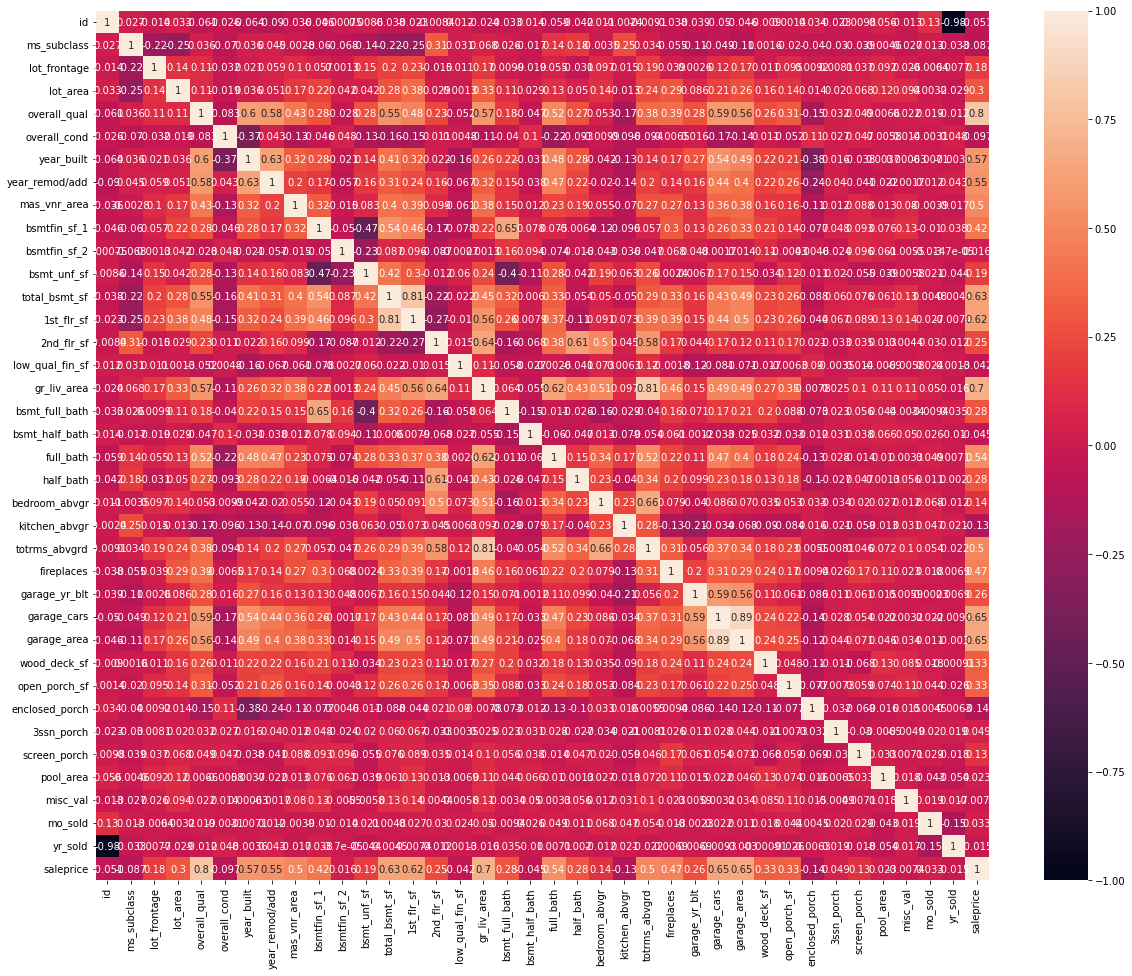

In [517]:
plt.figure(figsize = (20,16))
numeric_ames = ames.drop(columns = ['pid'])
sns.heatmap(numeric_ames.corr(), vmin = -1, annot = True); # excessive heatmap, just trying to see anything from numeric values

In [789]:
top_corrs_from_num_col = [i for i in (numeric_ames.corr().loc['saleprice'].sort_values(ascending=False)).iteritems() if i[1] > 0.5] # top corrs with saleprice
top_corrs_from_num_col

[('saleprice', 1.0),
 ('overall_qual', 0.8002068702531393),
 ('gr_liv_area', 0.6970384443056613),
 ('garage_area', 0.6498968496618986),
 ('garage_cars', 0.6477813459587393),
 ('total_bsmt_sf', 0.6293030962146706),
 ('1st_flr_sf', 0.6184861410533949),
 ('year_built', 0.5718488959135766),
 ('year_remod/add', 0.550369648819556),
 ('full_bath', 0.5379691021121237),
 ('totrms_abvgrd', 0.5040143180735323),
 ('mas_vnr_area', 0.5035785851404638)]

Numeric columns with high corr w/ salesprice =

* corr >= 0.7: overall_qual (already ordinal)
* corr >= 0.6: garage_area, garage_cars, total_bsmt_sf, gr_living_area, 1st_flr_sf (these two will likely have high col)
* corr >= 0.5: year_built, year_remod/add, full_bath, tot_rms_abvgrd, mas_vnr_area

Houses typically have higher sales price when they have higher overall quality material/build, higher sq_ft for above ground living area, spacious 1st floor, recently built/remodeled, more full bathrooms, and more total rooms above ground. Also, larger garage space and more masonry veneer area.

In [557]:
tcfnc_pair = top_corrs_from_num_col
tcfnc_pair.remove('garage_cars')
tcfnc_pair.remove('total_bsmt_sf')

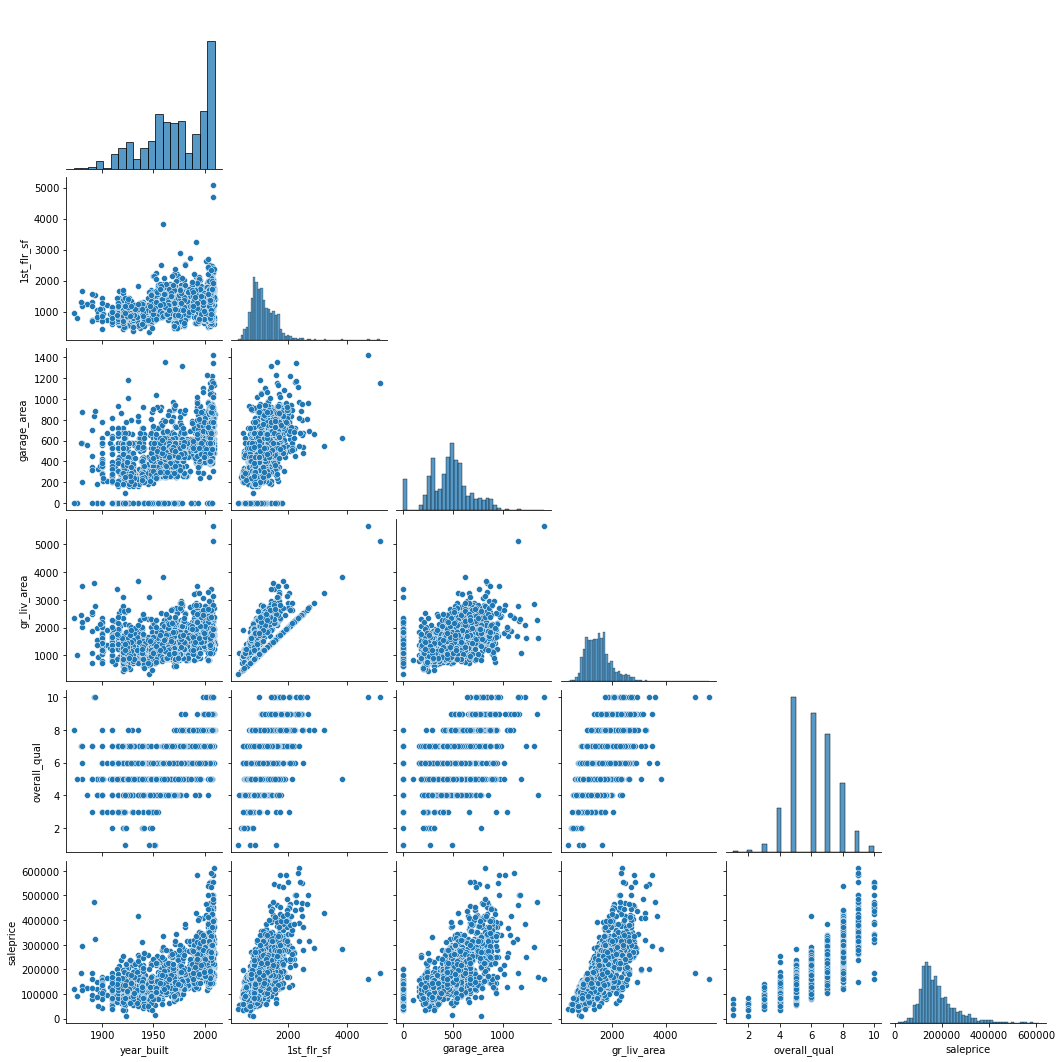

In [562]:
tcfnc_pair.reverse()

sns.pairplot(ames[tcfnc_pair[4:]], corner = True);
# tcfnc_pair[4:]

* As overall quality increases, sale price clearly increases.
* Ground living area increases with sale price, generally tops off around 3000sqft. but there are a couple outliers past that with significantly lower sale prices.
* practically one-to-one correlation between ground living area, total basement sqft, and 1st_flr_sqft indicating I should choose only one for my model
* garage area positively correlates with sale price, but strong corr with above groups. should likely choose 1 of all of these


Ideas for eda:

* Curious about outliers from Ground living area/Saleprice scatterplot
* saleprice by year
* saleprice by type of home
* dist of houses by age
* dist of yr remodeled - yr built, and compare vs sale price

In [577]:
pd.set_option('max_columns', None)

Curious about outliers from Ground living area/Saleprice scatterplot

In [581]:
# Curious about the two outliers from Ground living area/Saleprice scatterplot
gr_sp_outliers = ames.sort_values('gr_liv_area', ascending = False).head(2)
gr_sp_outliers.describe()

#overall qual = 10/10, overall_cond = 5/10, one house remodeled 1 year after being built, they were sold before being built
# ok so these are the houses mentioned in the dataset notes that are unusal and maybe should be removed

ames.sort_values('gr_liv_area', ascending = False).head().tail(3).describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.000000,3.000000
mean,2301.000000,9.053271e+08,56.666667,91.000000,29919.000000,7.000000,8.0,1928.666667,1993.0,0.0,141.666667,0.0,839.333333,981.000000,2391.333333,1118.000000,190.666667,3700.000000,0.0,0.0,2.666667,1.0,4.666667,1.0,10.000000,2.0,1981.666667,2.333333,766.666667,228.000000,237.333333,10.666667,0.0,136.666667,0.0,0.0,8.333333,2006.666667,391566.666667
std,696.323919,2.878287e+06,31.754265,31.511903,14882.218685,2.645751,1.0,33.946036,3.0,0.0,245.373864,0.0,742.606446,924.462547,1247.436304,981.184998,330.244354,108.738218,0.0,0.0,0.577350,0.0,0.577350,0.0,2.645751,0.0,19.629909,0.577350,123.569144,394.907584,147.313724,18.475209,0.0,236.713610,0.0,0.0,3.214550,1.154701,97290.098845
min,1498.000000,9.024001e+08,20.000000,60.000000,19800.000000,5.000000,7.0,1892.000000,1990.0,0.0,0.000000,0.0,0.000000,0.000000,1518.000000,0.000000,0.000000,3608.000000,0.0,0.0,2.000000,1.0,4.000000,1.0,7.000000,2.0,1959.000000,2.000000,624.000000,0.000000,80.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2006.000000,284700.000000
25%,2082.500000,9.039136e+08,47.500000,75.000000,21375.000000,5.500000,7.5,1913.500000,1991.5,0.0,0.000000,0.0,553.500000,553.500000,1677.000000,759.000000,0.000000,3640.000000,0.0,0.0,2.500000,1.0,4.500000,1.0,9.000000,2.0,1976.000000,2.000000,730.000000,0.000000,170.000000,0.000000,0.0,0.000000,0.0,0.0,6.500000,2006.000000,349850.000000
50%,2667.000000,9.054270e+08,75.000000,90.000000,22950.000000,6.000000,8.0,1935.000000,1993.0,0.0,0.000000,0.0,1107.000000,1107.000000,1836.000000,1518.000000,0.000000,3672.000000,0.0,0.0,3.000000,1.0,5.000000,1.0,11.000000,2.0,1993.000000,2.000000,836.000000,0.000000,260.000000,0.000000,0.0,0.000000,0.0,0.0,7.000000,2006.000000,415000.000000
75%,2702.500000,9.067906e+08,75.000000,106.500000,34978.500000,8.000000,8.5,1947.000000,1994.5,0.0,212.500000,0.0,1259.000000,1471.500000,2828.000000,1677.000000,286.000000,3746.000000,0.0,0.0,3.000000,1.0,5.000000,1.0,11.500000,2.0,1993.000000,2.500000,838.000000,342.000000,316.000000,16.000000,0.0,205.000000,0.0,0.0,9.500000,2007.000000,445000.000000
max,2738.000000,9.081541e+08,75.000000,123.000000,47007.000000,10.000000,9.0,1959.000000,1996.0,0.0,425.000000,0.0,1411.000000,1836.000000,3820.000000,1836.000000,572.000000,3820.000000,0.0,0.0,3.000000,1.0,5.000000,1.0,12.000000,2.0,1993.000000,3.000000,840.000000,684.000000,372.000000,32.000000,0.0,410.000000,0.0,0.0,12.000000,2008.000000,475000.000000


**saleprice by year**

In [597]:
list(zip(ames.groupby('yr_sold')['saleprice'].mean(), ames.groupby('yr_sold')['saleprice'].count(), ames.groupby('yr_sold')['mo_sold'].max())) # mean and count by year, max month

[(179471.6095890411, 438, 12),
 (185524.5140562249, 498, 12),
 (181750.3724137931, 435, 12),
 (182455.24439461884, 446, 12),
 (174180.05982905984, 234, 7)]

Looking at saleprice by year, there were dips in average saleprice from 2007-2008 and 2009-2010. 2010 has noticably lower sold homes, because data incomplete for 2010 year, stops in July.

**saleprice by type of home**

In [608]:
ames.groupby('ms_subclass')['saleprice'].mean().sort_values(ascending = False)

ms_subclass
60     239225.769036
120    211813.613636
75     204875.000000
20     189305.488312
80     169569.825581
85     154398.214286
70     153354.455556
150    148400.000000
90     139296.333333
160    138452.215909
50     137270.000000
190    124310.326087
40     119125.000000
45     116372.727273
180    109672.727273
30      94936.346535
Name: saleprice, dtype: float64

top 5 ms_subclasses: 
* 060	2-STORY 1946 & NEWER
* 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
* 075	2-1/2 STORY ALL AGES 
* 020	1-STORY 1946 & NEWER ALL STYLES
* 080	SPLIT OR MULTI-LEVEL

bottom 5 (starting from lowest mean sale price): 
* 030	1-STORY 1945 & OLDER
* 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
* 045	1-1/2 STORY - UNFINISHED ALL AGES
* 040	1-STORY W/FINISHED ATTIC ALL AGES
* 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Looking at the top subclasses, Two story houses 1946 and newer perform the best. it seems a house needs to be built 1946 or newer OR have more than 1 story to perform well. Comparing to the bottom subclasses, it seems like age is a very important component. The worst subclass is 1-story homes 1945 and older (I didn't think it would be that bad, thought some people would like an antique home 🤷🏽‍♂️).

Qualities for top-performing homes: New, 2+ stories, if PUD -> must be 1-story and newer

Qualities for bottom-performing homes: old, unfinished, if PUD -> will be multilevel

In [609]:
ames.groupby('bldg_type')['saleprice'].mean().sort_values(ascending = False)

bldg_type
TwnhsE    198312.372671
1Fam      185275.685882
Duplex    139296.333333
Twnhs     133100.000000
2fmCon    123179.891304
Name: saleprice, dtype: float64

Ends of townhouses perform much better than inside townhouses. 1 family detached homes are just under townhouse ends, which leads me to think the townhouses are generally in really good neighborhoods. Hmmm... 🤔

Also 2 family conversions (originally built as one-family dwelling) perform the worst.

In [611]:
ames.groupby('house_style')['saleprice'].mean().sort_values(ascending = False)

house_style
2.5Fin    243666.666667
2Story    206408.963211
2.5Unf    191785.714286
1Story    179809.194523
SLvl      166248.989362
SFoyer    149343.920000
1.5Fin    136480.091743
1.5Unf    112466.666667
Name: saleprice, dtype: float64

Unsurprising. The houses with more floors/finished have higher prices than houses that have less floors/unfinished.

**distribution of houses by age**

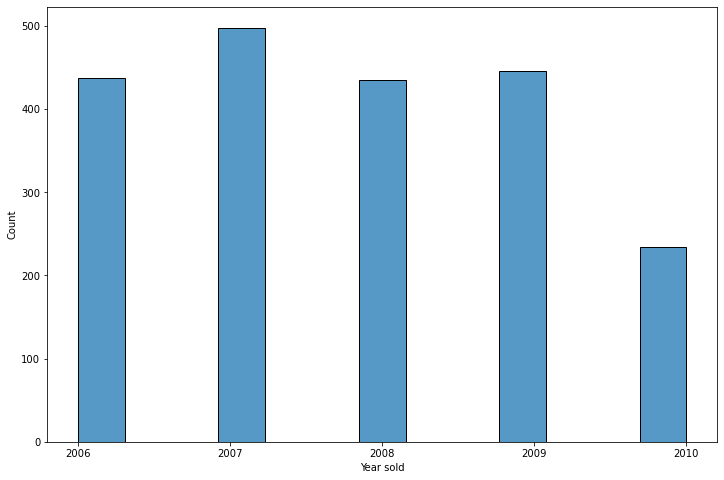

In [627]:
plt.figure(figsize=(12, 8))
sns.histplot(ames['yr_sold']);
plt.xticks(ticks = list(range(2006, 2011)));
plt.xlabel(xlabel='Year sold');

**distribution of (yr remodeled - yr built), and compare vs sale price**

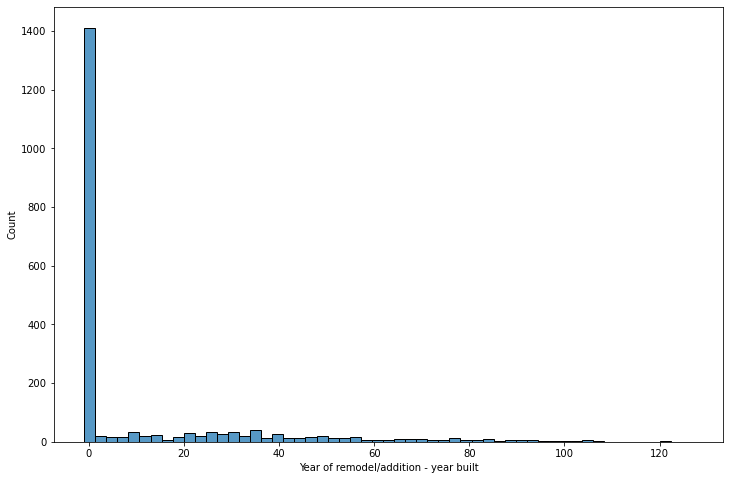

In [631]:
yr_remod_built_diff = ames['year_remod/add'] - ames['year_built']
plt.figure(figsize=(12, 8))
sns.histplot(yr_remod_built_diff);
plt.xlabel(xlabel='Year of remodel/addition - year built'); # (0 if never remodeled)

In [643]:
yrbd_vs_sp = pd.concat([yr_remod_built_diff, ames['saleprice']], axis = 1)
yrbd_vs_sp.columns = ['time', 'saleprice']

y = 28.08725684699943x + 142562.46747981638


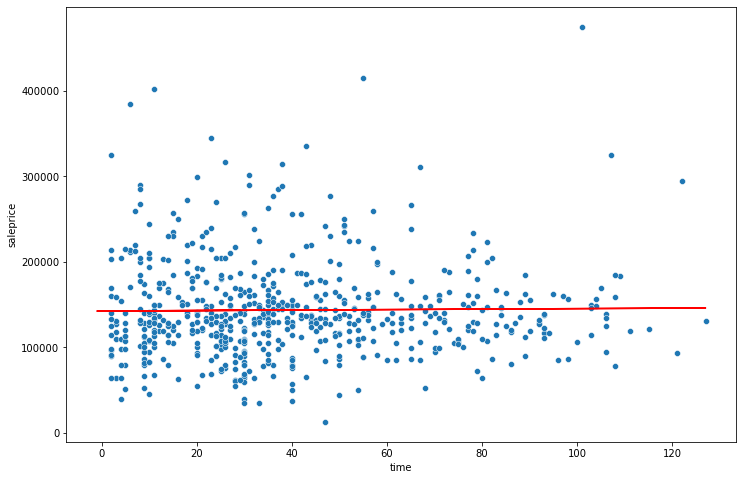

In [748]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=yrbd_vs_sp[yrbd_vs_sp['time'] > 1]['time'], y = yrbd_vs_sp[yrbd_vs_sp['time'] > 1]['saleprice']);

a, b = np.polyfit(yrbd_vs_sp[yrbd_vs_sp['time'] > 1]['time'], yrbd_vs_sp[yrbd_vs_sp['time'] > 1]['saleprice'], 1)

plt.plot(yr_remod_built_diff, (a*yr_remod_built_diff)+b, color='red')

print(f"y = {a}x + {b}")

Removing homes that I have never been remodeled/were remodeled a year after being built, there is a very small upward trend in the saleprice, the longer the time between building and remodeling is.

In [659]:
# first let's put ms_subclass back as an object
ames['ms_subclass'] = ames['ms_subclass'].astype(object)

In [663]:
#  iterate through every groupby and find highest means of sales price with categorical data
obj_cols = list(i[0] for i in ames.dtypes.iteritems() if i[1] == object)

In [733]:
all_means = [] # list of tuples with the groups that have the highest means
diff_btwn_consecutive_levels = [] # just finding the step ups in mean saleprice
sp_range = [] # finding the diff between groups with highest and lowest saleprice

for col in obj_cols:
    group_sp = [] # to find biggest step ups/max_range in mean saleprice in each group
    gb = ames.groupby(col)['saleprice'].mean().iteritems()
    for elem in gb:
        t = (col + '-' + str(elem[0]), elem[1])
        all_means.append(t)
        group_sp.append(t)
    
    sorted_group_sp = sorted(group_sp, key=lambda x: x[1], reverse=True)
    
    consecutive_diffs = [] # contains index of higher price in diffs (so to get difference in sale price value, just do list[index] - list[index + 1])
    
    for idx, _ in enumerate(sorted_group_sp): # finding the step ups in mean saleprice for each group
        if (idx < len(sorted_group_sp) - 1):
            diff = sorted_group_sp[idx][1] - sorted_group_sp[idx + 1][1] # diff in saleprice
            consecutive_diffs.append(((sorted_group_sp[idx][0], sorted_group_sp[idx + 1][0]), diff))
    
    diff_btwn_consecutive_levels += consecutive_diffs
    
    # for finding range (max group saleprice vs min group saleprice)
    
    max_group = sorted_group_sp[0]
    min_group = sorted_group_sp[len(sorted_group_sp)-1]
    
    max_min_range = ((max_group[0], min_group[0]), max_group[1] - min_group[1])
    sp_range.append(max_min_range)

In [734]:
# code from https://stackoverflow.com/questions/10695139/sort-a-list-of-tuples-by-2nd-item-integer-value
sorted_all_means = sorted(all_means, key=lambda x: x[1], reverse=True)
sorted_diff_btwn_consecutive_levels = sorted(diff_btwn_consecutive_levels, key=lambda x: x[1], reverse=True)
sorted_sp_range = sorted(sp_range, key=lambda x: x[1], reverse=True)

In [746]:
sorted_all_means[:20]

[('condition_2-PosN', 395666.6666666667),
 ('condition_2-PosA', 390666.6666666667),
 ('exter_qual-Ex', 374460.3086419753),
 ('roof_matl-WdShngl', 339400.0),
 ('kitchen_qual-Ex', 336424.4635761589),
 ('fireplace_qu-Ex', 331481.48387096776),
 ('neighborhood-StoneBr', 329675.7368421053),
 ('bsmt_qual-Ex', 329506.6195652174),
 ('neighborhood-NridgHt', 322831.3524590164),
 ('neighborhood-NoRidge', 316294.125),
 ('pool_qc-Ex', 315000.0),
 ('neighborhood-GrnHill', 280000.0),
 ('sale_type-New', 279021.05625),
 ('bsmt_exposure-Gd', 271610.5665024631),
 ('roof_matl-WdShake', 264250.0),
 ('mas_vnr_type-Stone', 263714.70238095237),
 ('garage_qual-Gd', 262989.27777777775),
 ('land_contour-HLS', 262353.37647058826),
 ('exterior_1st-ImStucc', 262000.0),
 ('exterior_1st-Stone', 258500.0)]

In [744]:
print(sorted_diff_btwn_consecutive_levels[:30])

[(('condition_2-PosA', 'condition_2-RRAe'), 200666.6666666667), (('exter_qual-Ex', 'exter_qual-Gd'), 143657.8237065377), (('bsmt_qual-Ex', 'bsmt_qual-Gd'), 126969.03738929148), (('kitchen_qual-Ex', 'kitchen_qual-Gd'), 124795.0119632557), (('pool_qc-Ex', 'pool_qc-Gd'), 98507.5), (('fireplace_qu-Ex', 'fireplace_qu-Gd'), 97903.09572565227), (('street-Pave', 'street-Grvl'), 94892.13698630138), (('exter_qual-Gd', 'exter_qual-TA'), 87531.50658740231), (('central_air-Y', 'central_air-N'), 86866.42565073707), (('utilities-NoSeWa', 'utilities-NoSewr'), 79875.0), (('roof_matl-WdShngl', 'roof_matl-WdShake'), 75150.0), (('pool_qc-Fa', 'pool_qc-TA'), 74000.0), (('kitchen_qual-Gd', 'kitchen_qual-TA'), 72127.84416304648), (('garage_qual-TA', 'garage_qual-Fa'), 72127.81008360848), (('bsmtfin_type_1-GLQ', 'bsmtfin_type_1-Unf'), 71441.9884803624), (('misc_feature-TenC', 'misc_feature-Elev'), 66150.0), (('bsmt_exposure-Gd', 'bsmt_exposure-Av'), 65348.1151135742), (('electrical-SBrkr', 'electrical-FuseA')

In [765]:
alt_cols = ['utilities', 'house_style', 'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 
            'mas_vnr_type', 'exter_qual', 'exter_cond', 'bsmt_qual', 'heating', 'heating_qc', 'central_air', 'electrical', 
           'garage_area', 'garage_qual',  'paved_drive', 'open_porch_sf', 'pool_area', 'pool_qc', 'fence']

[i for i in sorted_sp_range if i[0][0].split('-')[0] in alt_cols]

[(('exter_qual-Ex', 'exter_qual-Fa'), 284659.11633428297),
 (('bsmt_qual-Ex', 'bsmt_qual-Po'), 240506.6195652174),
 (('garage_qual-Gd', 'garage_qual-Po'), 197989.27777777775),
 (('exter_cond-Ex', 'exter_cond-Po'), 191463.85714285713),
 (('exterior_1st-ImStucc', 'exterior_1st-AsphShn'), 179625.0),
 (('roof_matl-WdShngl', 'roof_matl-ClyTile'), 179400.0),
 (('pool_qc-Ex', 'pool_qc-TA'), 173500.0),
 (('exterior_2nd-CmentBd', 'exterior_2nd-CBlock'), 147540.2),
 (('heating_qc-Ex', 'heating_qc-Po'), 146994.27417840378),
 (('house_style-2.5Fin', 'house_style-1.5Unf'), 131200.0),
 (('utilities-AllPub', 'utilities-NoSewr'), 123926.60224499757),
 (('electrical-SBrkr', 'electrical-Mix'), 120770.38222698073),
 (('mas_vnr_type-Stone', 'mas_vnr_type-BrkCmn'), 119199.01007326005),
 (('heating-GasA', 'heating-Grav'), 117242.47670961349),
 (('central_air-Y', 'central_air-N'), 86866.42565073707),
 (('roof_style-Hip', 'roof_style-Gambrel'), 86158.32157850545),
 (('paved_drive-Y', 'paved_drive-N'), 84229.3

In [764]:
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

The results of above code:

* sorted_all_means: list of tuples of all groups and mean saleprice in each groupby made with every object column, sorted descending by mean saleprice. Format of tuple: ('Category'-'group', mean_saleprice)
* sorted_diff_btwn_consecutive_levels = list of tuples of differences in mean sale price between consecutive groups in each object column. sorted descending by mean saleprice. Format of tuple (('Category'-'group_with_higher_mean_price', 'Category'-'group_with_lower_mean_price'), positive_diff_in_mean_saleprice)
* sorted_sp_range - list of tuples of differences in mean sale price between group with highest mean sale price and group with lowest mean saleprice in each object column. Format of tuple (('Category'-'group_with_higher_mean_price', 'Category'-'group_with_lower_mean_price'), positive_diff_in_mean_saleprice)

In [741]:
# save_df(ames, replace_main_df=True) saving df with change to ms_subclass

---